Chapter 27
# Rank Correlation

Correlation is a measure of the association between the observed values of two variables.  Correlation quantifies the association, often with a correlation coefficient representing:
- -1 = perfectly negatively correlated
- +1 = perfectly positively correlated
- 0 is neutral i.e. the variables are not associated

Correlation is easy to calculate and interpret when both variables have a well understood Gaussian distribution e.g. using Pearson;s correlation.

When we do not know the distribution of the variables, we must use nonparametric rank correlation methods.  These methods use the ordinal relationship between the values rather than the specific values.  Ordinal data is data that has label values and has an order or rank relationship e.g. low, medium and high

Rank correlation can be calculated for real-valued variables.  This is done by first converting the values for each variable into rank data.  Rank correlation coefficients can then be calculated in order to quantify the association between the two ranked variables.

Because no distribution for the values is assumed, rank correlation methods are referred to as distribution-free correlation or nonparametric correlation.  

Methods include:
- Spearman's Rank Correlation
- Kendall's Rank Correlation
- Goodman and Kruskal's Rank Correlation
- Somers' Rank Correlation

# Test Dataset
We will define a simple two-variable dataset where each variable is drawn from a uniform distribution (non-Gaussian) and the values of the second variable depend on the values of the first variable.

1000 random floating point values are drawn from a uniform distribution and scaled in the range 0 to 20

A second sample of 1000 random floating point values are drawn from a uniform distribution between 0 and 10, and added to the values in the first sample to create an association

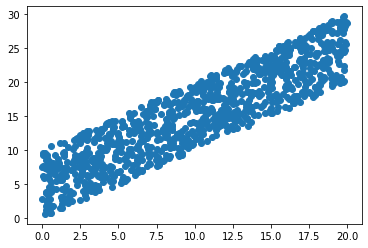

In [2]:
# generate related variables
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot as plt

# seed random number generator
seed(1)

# prepare data
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)

# plot
plt.scatter(data1, data2)
plt.show()

# Spearman's Rank Correlation
This is denoted by the lowercase Greek letter rho, and may also be referred to as Spearman's rho

This method quantifies the degree to which ranked variables are associated by a monotonic function, meaning an increasing or decreasing relationship.  The null hypothesis (H0) is that the samples are uncorrelated

Spearman's rank correlation calculates a Pearson's correlation using rank values instead of real values.  

It can be calculated using the SciPy function spearmanr(), accepting two real-valued samples as arguments, and returning both the correlation coefficient (range -1 to 1) and p-value for interpreting the significance of the coefficient

In [3]:
# calculate the spearman's correlation between two variables
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr

# seed random number generator
seed(1)

# prepare data as before
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)

# calculate spearman's correlation
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)

# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.900
Samples are correlated (reject H0) p=0.000


# Kendall's Rank Correlation
This is often referred to by the lowercase Greek letter tau, and may be referred to as Kendall's tau

The method calculates a normalised score for the number of matching or concordant rankings between the two samples.

It can be calculated using the SciPy function kendalltau(), which takes two data samples as arguments, and returns the correlation coefficient and p-value

The null hypothesis (H0) is that there is no association between the two samples

In [4]:
# calculate the kendall's correlation between two variables
from numpy.random import rand
from numpy.random import seed
from scipy.stats import kendalltau

# seed random number generator
seed(1)

# prepare data
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)

# calculate kendall's correlation
coef, p = kendalltau(data1, data2)
print('Kendall correlation coefficient: %.3f' % coef)

# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Kendall correlation coefficient: 0.709
Samples are correlated (reject H0) p=0.000


# Extensions

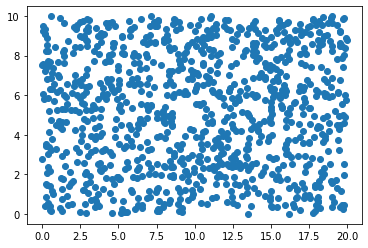

Spearmans correlation coefficient: 0.030
Samples are uncorrelated (fail to reject H0) p=0.346


In [5]:
# update the Spearman's example to calculate the correlation between uncorrelated data samples drawn from a non-Gaussian distribution
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot as plt
from scipy.stats import spearmanr

# seed random number generator
seed(1)

# prepare data without correlating
data1 = rand(1000) * 20
data2 = rand(1000) * 10

# plot
plt.scatter(data1, data2)
plt.show()

# calculate spearman's correlation
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)

# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

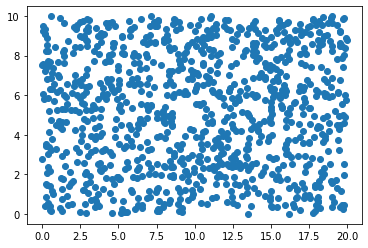

Kendall correlation coefficient: 0.021
Samples are uncorrelated (fail to reject H0) p=0.331


In [6]:
# update the Kendall's example to calculate the correlation between uncorrelated data samples drawn from a non-Gaussian distribution
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot as plt
from scipy.stats import kendalltau

# seed random number generator
seed(1)

# prepare data without correlating
data1 = rand(1000) * 20
data2 = rand(1000) * 10

# plot
plt.scatter(data1, data2)
plt.show()

# calculate kendall's correlation
coef, p = kendalltau(data1, data2)
print('Kendall correlation coefficient: %.3f' % coef)

# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

In [11]:
# load a standard machine learning dataset and calculate the pairwse nonparametric correlation between all variables
import pandas as pd
from matplotlib import pyplot as plt

# import air quality data
filename = '27 titanic.csv'
data = pd.read_csv(filename)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


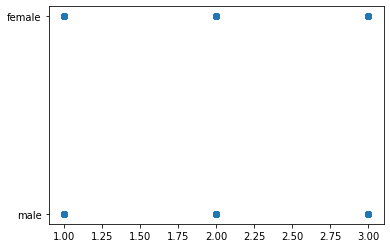

Spearmans correlation coefficient: 0.136
Samples are correlated (reject H0) p=0.000


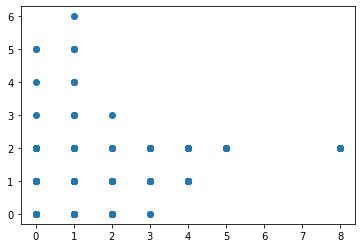

Spearmans correlation coefficient: 0.450
Samples are correlated (reject H0) p=0.000


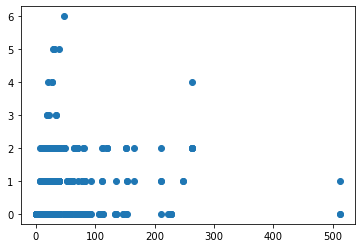

Spearmans correlation coefficient: 0.410
Samples are correlated (reject H0) p=0.000


In [21]:
# calculate spearman's correlation
from scipy.stats import spearmanr
from matplotlib import pyplot as plt

def calc_spearman(data1, data2):
    # plot
    plt.scatter(data1, data2)
    plt.show()

    # calculate the coefficient
    coef, p = spearmanr(data1, data2)
    print('Spearmans correlation coefficient: %.3f' % coef)

    # interpret the significance
    alpha = 0.05
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
        print('Samples are correlated (reject H0) p=%.3f' % p)

calc_spearman(data['Pclass'], data['Sex'])
calc_spearman(data['SibSp'], data['Parch'])
calc_spearman(data['Fare'], data['Parch'])